<a href="https://colab.research.google.com/github/AdrianEspinoza92/03MIAR---Algoritmos-de-Optimizacion/blob/main/AG3/AlgoritmosCarlosAdrianEspinoza_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Carlos Adrian Espinoza Alvarez <br>
Link:   https://colab.research.google.com/drive/1PxEVtpIFjKMkMUooG8szljf9eC_5bAYY?usp=sharing <br>
Github: https://github.com/AdrianEspinoza92/03MIAR---Algoritmos-de-Optimizacion.git
<br>




In [2]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

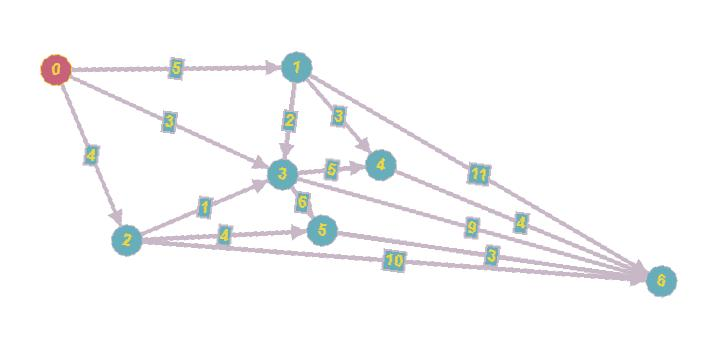

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [3]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [5]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [6]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [7]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [8]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [9]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [10]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [11]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [12]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [23]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



In [24]:
ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (3, 2, 0, 1), 'ci': 81}]  en  15  iteraciones  para dimension:  4


## Implementacion de tarea 1


In [29]:
#Imports
import numpy as np
import itertools
import time
import pandas as pd
import matplotlib.pyplot as plt

from google.colab.data_table import DataTable


In [25]:
# Función para generar matrices de costos aleatorias
def generar_matriz_costos(dimension, rango=(10, 50)):
    return np.random.randint(rango[0], rango[1], size=(dimension, dimension))

In [30]:
# Algoritmo de Fuerza Bruta
def fuerza_bruta(COSTES):
    start_time = time.time()  # Medir tiempo de ejecución

    N = len(COSTES)  # Número de tareas/agentes
    mejor_valor = float('inf')  # Inicializamos con infinito
    mejor_solucion = ()

    for s in itertools.permutations(range(N)):  # Todas las asignaciones posibles
        valor_tmp = valor(s, COSTES)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s

    elapsed_time = time.time() - start_time  # Tiempo transcurrido

    print(f"\nFuerza Bruta: Mejor solución: {mejor_solucion} con costo: {mejor_valor}")
    print(f"Tiempo de ejecución: {elapsed_time:.4f} segundos")

    return mejor_valor, elapsed_time

In [34]:
resultados = []

for N in range(3, 12):  # Desde 3x3 hasta 15x15
    print(f"\n=== Evaluando N={N} ===")
    COSTES = generar_matriz_costos(N)

    # Evaluar Fuerza Bruta
    fb_costo, fb_tiempo = fuerza_bruta(COSTES)

    # Evaluar Ramificación y Poda
    start_time = time.time()
    ramificacion_y_poda(COSTES)
    rp_tiempo = time.time() - start_time

    # Guardar resultados
    resultados.append((N, fb_tiempo, rp_tiempo))

    print(f"Tiempo Fuerza Bruta: {fb_tiempo:.4f} s")
    print(f"Tiempo Ramificación y Poda: {rp_tiempo:.4f} s")



=== Evaluando N=3 ===

Fuerza Bruta: Mejor solución: (1, 0, 2) con costo: 47
Tiempo de ejecución: 0.0001 segundos
La solucion final es: [{'s': (1, 0, 2), 'ci': 47}]  en  6  iteraciones  para dimension:  3
Tiempo Fuerza Bruta: 0.0001 s
Tiempo Ramificación y Poda: 0.0030 s

=== Evaluando N=4 ===

Fuerza Bruta: Mejor solución: (0, 1, 2, 3) con costo: 79
Tiempo de ejecución: 0.0001 segundos
La solucion final es: (0, 1, 2, 3)  en  9  iteraciones  para dimension:  4
Tiempo Fuerza Bruta: 0.0001 s
Tiempo Ramificación y Poda: 0.0021 s

=== Evaluando N=5 ===

Fuerza Bruta: Mejor solución: (4, 2, 1, 3, 0) con costo: 68
Tiempo de ejecución: 0.0003 segundos
La solucion final es: [{'s': (4, 2, 1, 3, 0), 'ci': 68}]  en  15  iteraciones  para dimension:  5
Tiempo Fuerza Bruta: 0.0003 s
Tiempo Ramificación y Poda: 0.0044 s

=== Evaluando N=6 ===

Fuerza Bruta: Mejor solución: (3, 5, 4, 1, 2, 0) con costo: 115
Tiempo de ejecución: 0.0014 segundos
La solucion final es: [{'s': (3, 5, 4, 1, 2, 0), 'ci': 1

In [53]:
resultados2 = []
for N in range(3, 12):  # Desde 3x3 hasta 13x13
    print(f"\n=== Evaluando N={N} ===")
    COSTES = generar_matriz_costos(N)

    # Evaluar Ramificación y Poda
    start_time = time.time()
    ramificacion_y_poda(COSTES)
    rp_tiempo = time.time() - start_time

    # Guardar resultados
    resultados2.append((N, rp_tiempo))

    print(f"Tiempo Ramificación y Poda: {rp_tiempo:.4f} s")


=== Evaluando N=3 ===
La solucion final es: (0, 1, 2)  en  2  iteraciones  para dimension:  3
Tiempo Ramificación y Poda: 0.0002 s

=== Evaluando N=4 ===
La solucion final es: [{'s': (2, 1, 3, 0), 'ci': 87}]  en  12  iteraciones  para dimension:  4
Tiempo Ramificación y Poda: 0.0003 s

=== Evaluando N=5 ===
La solucion final es: [{'s': (0, 3, 2, 4, 1), 'ci': 96}]  en  45  iteraciones  para dimension:  5
Tiempo Ramificación y Poda: 0.0011 s

=== Evaluando N=6 ===
La solucion final es: [{'s': (2, 3, 4, 0, 5, 1), 'ci': 104}]  en  117  iteraciones  para dimension:  6
Tiempo Ramificación y Poda: 0.0068 s

=== Evaluando N=7 ===
La solucion final es: [{'s': (2, 6, 4, 5, 3, 1, 0), 'ci': 116}]  en  171  iteraciones  para dimension:  7
Tiempo Ramificación y Poda: 0.0069 s

=== Evaluando N=8 ===
La solucion final es: [{'s': (3, 6, 7, 0, 5, 4, 2, 1), 'ci': 136}]  en  1478  iteraciones  para dimension:  8
Tiempo Ramificación y Poda: 0.1191 s

=== Evaluando N=9 ===
La solucion final es: [{'s': (8, 

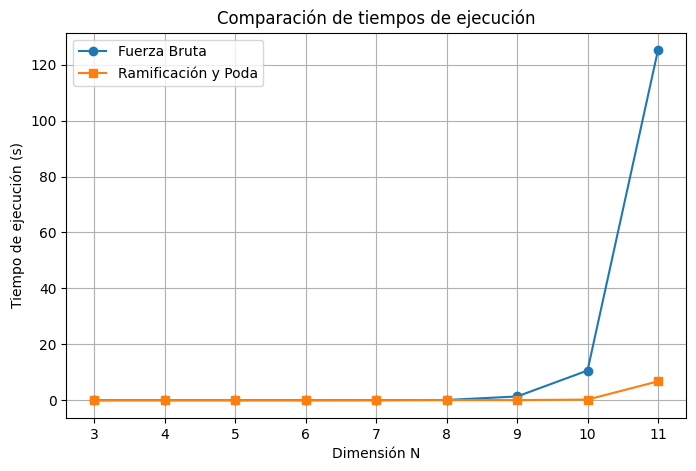

In [35]:
# Crear DataFrame con los resultados
df = pd.DataFrame(resultados, columns=['N', 'Fuerza Bruta (s)', 'Ramificación y Poda (s)'])

DataTable(df)  # Muestra la tabla interactiva

# Graficar los tiempos de ejecución
plt.figure(figsize=(8, 5))
plt.plot(df['N'], df['Fuerza Bruta (s)'], marker='o', linestyle='-', label="Fuerza Bruta")
plt.plot(df['N'], df['Ramificación y Poda (s)'], marker='s', linestyle='-', label="Ramificación y Poda")

plt.xlabel("Dimensión N")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("Comparación de tiempos de ejecución")
plt.legend()
plt.grid(True)
plt.show()


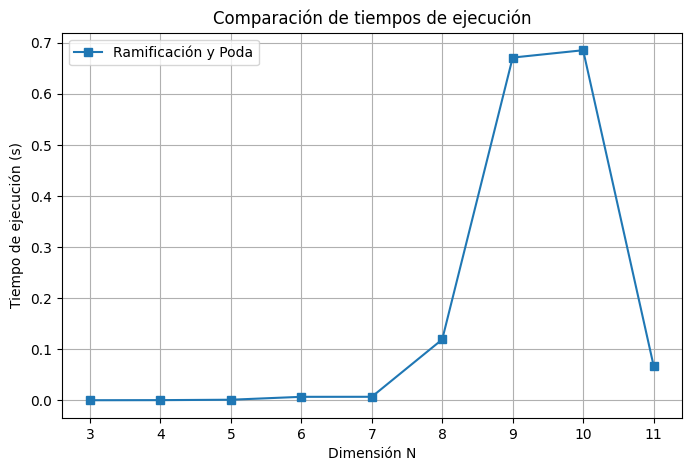

In [55]:
# Crear DataFrame con los resultados
df2 = pd.DataFrame(resultados2, columns=['N', 'Ramificación y Poda (s)'])

DataTable(df2)  # Muestra la tabla interactiva

# Graficar los tiempos de ejecución
plt.figure(figsize=(8, 5))
plt.plot(df2['N'], df2['Ramificación y Poda (s)'], marker='s', linestyle='-', label="Ramificación y Poda")

plt.xlabel("Dimensión N")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("Comparación de tiempos de ejecución")
plt.legend()
plt.grid(True)
plt.show()

## **¿A partir de qué dimensión el algoritmo por fuerza bruta deja de ser una opción?**

El algoritmo de **fuerza bruta** evalúa todas las posibles asignaciones, por lo que su **complejidad factorial** $O(n!)$ hace que el tiempo de ejecución crezca de manera exponencial. Según nuestras pruebas:

- Para **$ n = 3 $ a $ n = 6 $**, el tiempo de ejecución es manejable.
- Para **$ n = 7 $**, se observa un incremento notable en el tiempo de cómputo.
- Para **$ n = 8 $**, la ejecución ya se vuelve muy lenta.
- Para **$ n \geq 9 $**, el tiempo de ejecución es **demasiado alto** y no se pudo completar en un tiempo razonable.

Por lo tanto, **fuerza bruta deja de ser viable a partir de $ n = 8 $** en este experimento.


## **¿Hay algún valor de la dimensión a partir del cual el algoritmo de ramificación y poda también deja de ser una opción válida?**

El algoritmo de **ramificación y poda** mejora la eficiencia mediante la eliminación de ramas no óptimas, reduciendo el espacio de búsqueda en comparación con la fuerza bruta. Sin embargo, su **complejidad aún es exponencial** en el peor caso.

En esta prueba:

- Para **$ n = 3 $ a $ n = 8 $**, el tiempo de ejecución se mantuvo aceptable.
- Para **$ n = 9 $ y $ n = 10 $**, el tiempo de ejecución aumentó, pero el algoritmo aún finalizó en un tiempo razonable.
- Para **$ n > 10 $**, el tiempo de ejecución comenzó a ser **excesivo**, y no se logró determinar en qué punto exacto deja de ser viable.

Dado que el rendimiento del algoritmo de **ramificación y poda depende del número de podas efectuadas**, en esta ejecución no fue posible determinar con certeza un límite exacto para su utilidad.


## **Conclusión**

- **Fuerza bruta** deja de ser viable a partir de **$ n = 8 $**.
- **Ramificación y poda** sigue siendo manejable hasta **$ n = 10 $**, pero para valores mayores el tiempo de ejecución aumenta considerablemente.
- No se pudo determinar un **punto exacto** donde **ramificación y poda deja de ser viable**, ya que depende de la estructura del problema y de la cantidad de podas realizadas.

Para valores de **$  > 10 $**, se recomienda explorar **técnicas heurísticas o metaheurísticas** como **búsqueda tabú, algoritmos genéticos o enfoques de optimización aproximada**.



##Descenso del gradiente

In [41]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [42]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

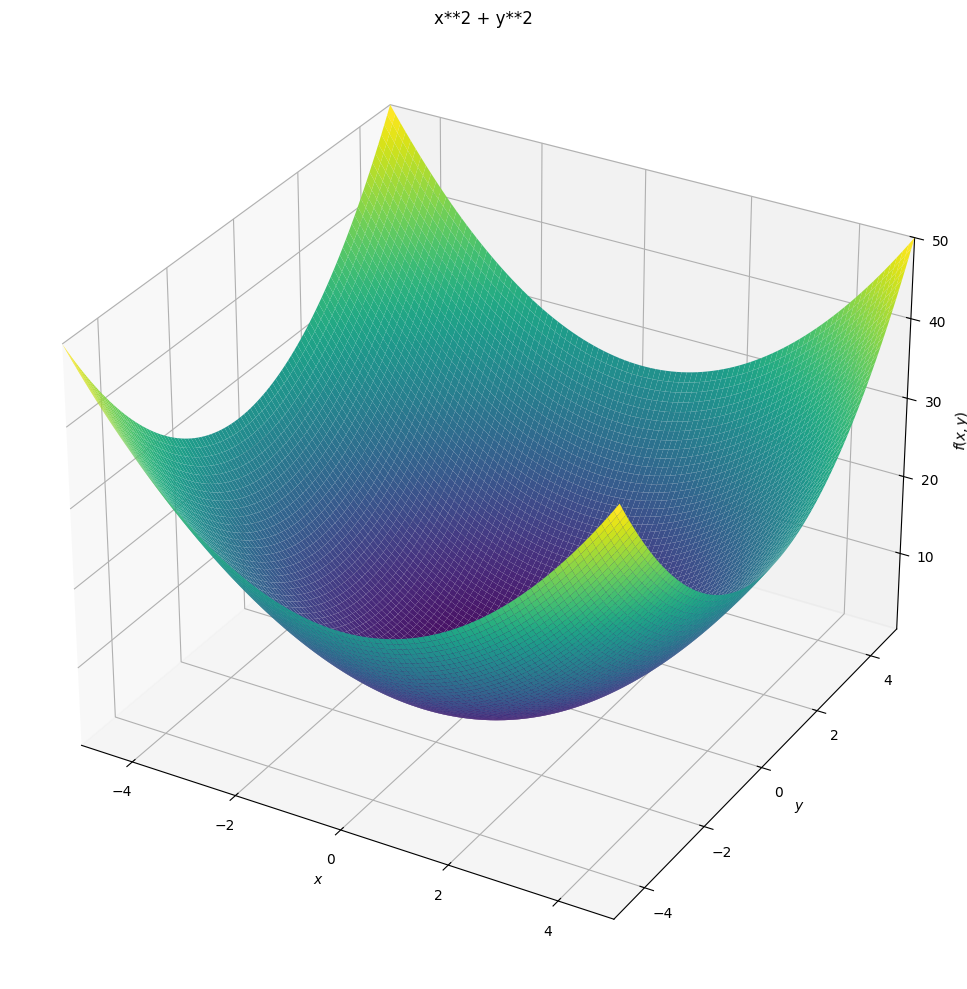

In [43]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

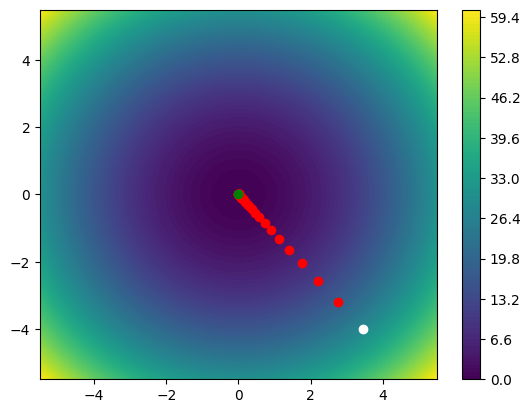

Solucion: [4.909107106252703e-05, -5.713889291761277e-05] 5.6747863419164975e-09


In [44]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
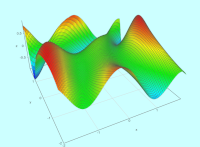


## Implementacion de tarea 2

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sympy import symbols, diff, sin, cos, exp

In [50]:
# Definir variables simbólicas
x, y = symbols('x y')

# Definir la nueva función
f_sym = sin((1/2) * x**2 - (1/4) * y**2 + 3) * cos(2*x + 1 - exp(y))

# Calcular gradiente (derivadas parciales)
df_dx = diff(f_sym, x)
df_dy = diff(f_sym, y)

# Convertir a funciones numéricas
f = lambda X: math.sin((1/2) * X[0]**2 - (1/4) * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

df = lambda X: [ float(df_dx.evalf(subs={x: X[0], y: X[1]})),
                 float(df_dy.evalf(subs={x: X[0], y: X[1]})) ]


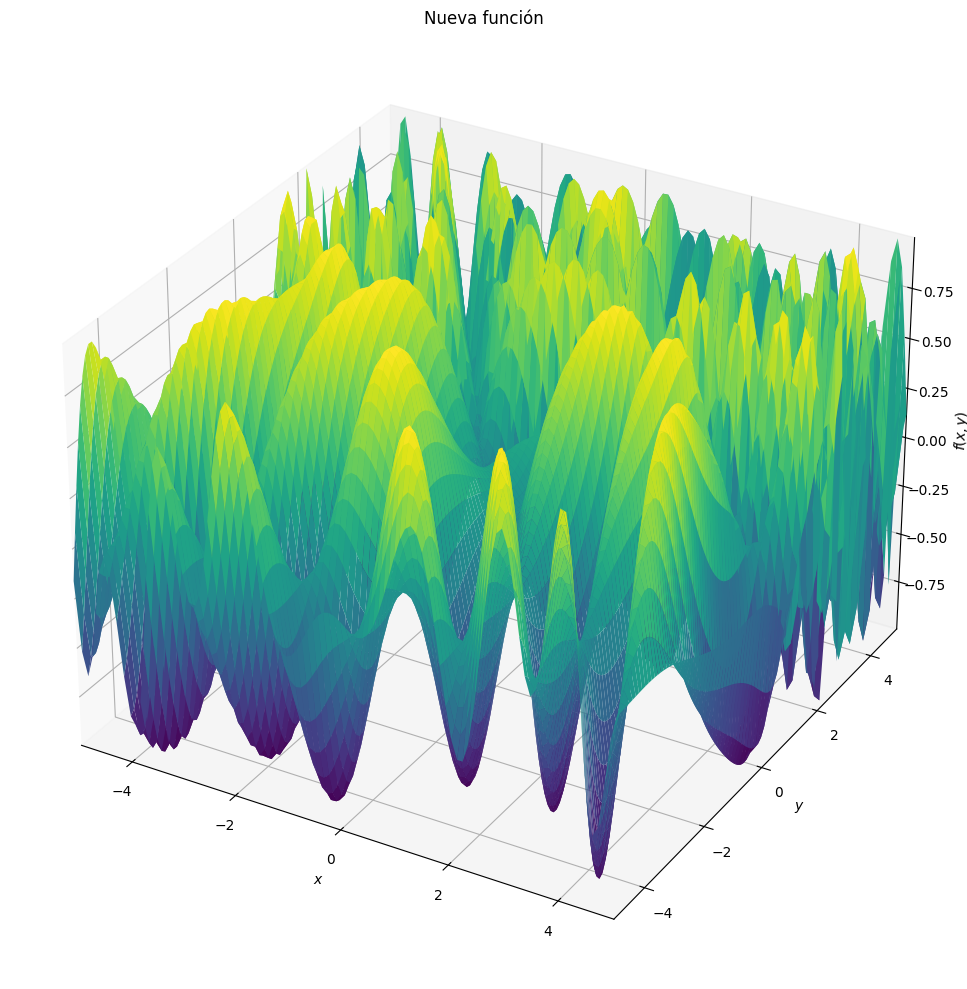

In [51]:
from sympy.plotting import plot3d

# Dibujar la función 3D
plot3d(f_sym,
       (x, -5, 5), (y, -5, 5),
       title='Nueva función',
       size=(10,10))


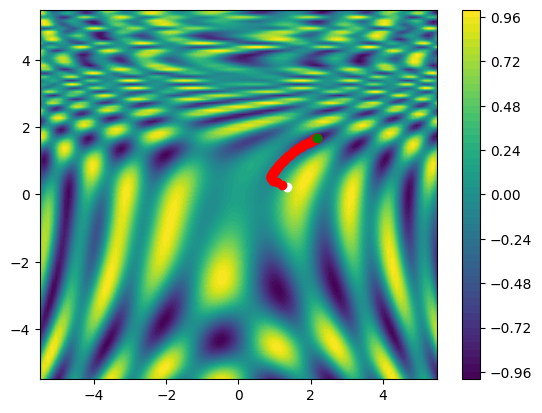

Solución encontrada: [2.181160895359639, 1.6773190139370302] Valor de f(P): -0.9992533946879617


In [57]:
# Preparar datos para el mapa de niveles
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x_val in enumerate(X):
    for iy, y_val in enumerate(Y):
        Z[iy, ix] = f([x_val, y_val])

# Pintar el mapa de niveles de Z
plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar()

# Generar un punto inicial aleatorio
P = [random.uniform(-10.5, 10.5), random.uniform(-10.5, 10.5)]
plt.plot(P[0], P[1], "o", color="white")  # Pintar punto inicial

# Tasa de aprendizaje fija
TA = 0.1

# Iteraciones del descenso del gradiente
for _ in range(50):
    grad = df(P)
    P[0] -= TA * grad[0]
    P[1] -= TA * grad[1]
    plt.plot(P[0], P[1], "o", color="red")  # Pintar el camino recorrido

# Pintar el punto final en verde
plt.plot(P[0], P[1], "o", color="green")
plt.show()

# Mostrar resultado final
print("Solución encontrada:", P, "Valor de f(P):", f(P))
